In [17]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten

import warnings
warnings.filterwarnings('ignore')

In [18]:
(X_train,y_train),(X_test,y_test) = keras.datasets.mnist.load_data()

In [19]:
X_test.shape

(10000, 28, 28)

In [20]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

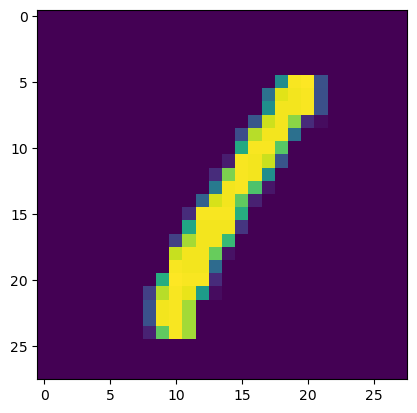

In [27]:
import matplotlib.pyplot as plt
plt.imshow(X_train[3])

In [28]:
X_train = X_train/255
X_test = X_test/255

In [46]:
model = Sequential()
# Flatten Layer
model.add(Flatten(input_shape=(28,28)))
# Input Layer
model.add(Dense(128,activation='relu'))
# Hidden Layers
model.add(Dense(32,activation='relu'))
# Output Layer
model.add(Dense(10,activation='softmax'))

In [47]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_4 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 32)             │         4,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 104,938 (409.91 KB)

 Trainable params: 104,938 (409.91 KB)

 Non-trainable params: 0 (0.00 B)

In [48]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [49]:
history = model.fit(X_train,y_train,epochs=25,validation_split=0.2)

Epoch 1/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.5217 - loss: 1.4964 - val_accuracy: 0.8596 - val_loss: 0.4873
Epoch 2/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8662 - loss: 0.4658 - val_accuracy: 0.8969 - val_loss: 0.3627
Epoch 3/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8914 - loss: 0.3795 - val_accuracy: 0.9081 - val_loss: 0.3201
Epoch 4/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9047 - loss: 0.3335 - val_accuracy: 0.9125 - val_loss: 0.2990
Epoch 5/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9113 - loss: 0.3028 - val_accuracy: 0.9187 - val_loss: 0.2784
Epoch 6/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9155 - loss: 0.2895 - val_accuracy: 0.9242 - val_loss: 0.2561
Epoch 7/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9241 - loss: 0.2697 - val_accuracy: 0.9299 - val_loss: 0.2421
Epoch 8/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9282 - loss: 0.2473 - 

In [50]:
y_prob = model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [51]:
y_pred = y_prob.argmax(axis=1)

In [52]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9656

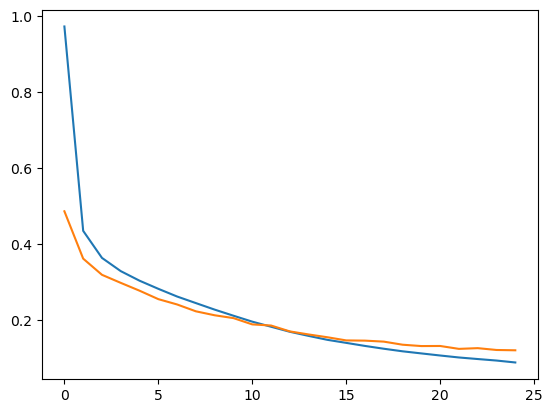

In [53]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

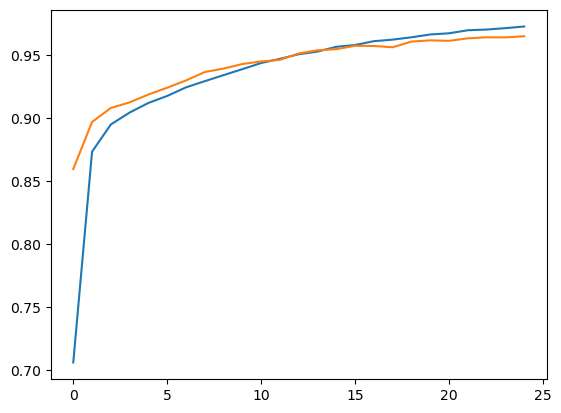

In [54]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

In [55]:
model.predict(X_test[3].reshape(1,28,28)).argmax(axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


array([0], dtype=int64)

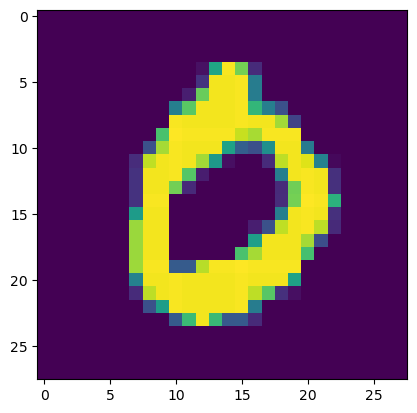

In [56]:
plt.imshow(X_test[3])